## Observations and Insights 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata_df, study_results_df, how='outer')

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
dup_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data["Mouse ID"].value_counts()
number_of_clean_mice = len(clean_mice)
number_of_clean_mice

248

In [39]:
clean_data.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_data['Tumour Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumour Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumour Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumour Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumour Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumour Volume":mean, 
                            "Median Tumour Volume":median, 
                           "Tumour Volume Variance":var, 
                           "Tumour Volume Std. Dev.":std, 
                           "Tumour Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat


,Mean Tumour Volume,Median Tumour Volume,Tumour Volume Variance,Tumour Volume Std. Dev.,Tumour Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregate =  clean_data.groupby(['Drug Regimen'])[['Tumour Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregate


Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#first create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = clean_data["Drug Regimen"].value_counts()
mice_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

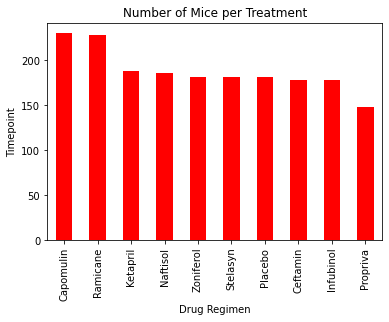

In [43]:
#Bar plot using pandas
plot_pandas = mice_count.plot.bar(color='r')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.title("Number of Mice per Treatment")

In [44]:
clean_data.columns


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumour Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

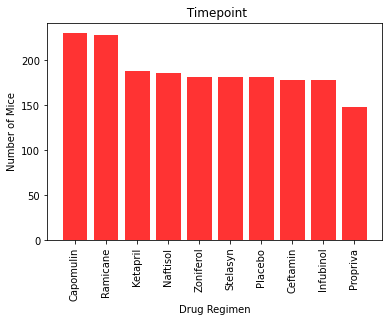

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='r', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title(" Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

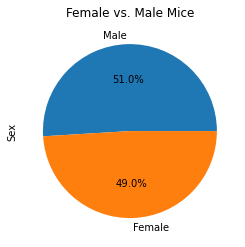

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = clean_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
sex_data.plot.pie(autopct= "%1.1f%%")
plt.show()


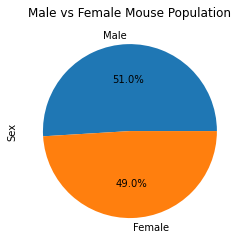

In [47]:
labels = ['Female', 'Male']
# sizes = [49.7999197, 50.200803]
plot = sex_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


In [49]:
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_data = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_data = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

In [65]:
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [50]:
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
Capomulin_greatest = Capomulin_data.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_greatest)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumour Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [51]:
#Capomulin
Capomulin_greatest = Capomulin_data.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_greatest)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

Capomulin_tumours = Capomulin_merge["Tumour Volume (mm3)"]

quartiles =Capomulin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumours: {lowerq}")
print(f"The upper quartile of Capomulin tumours: {upperq}")
print(f"The interquartile range of Capomulin tumours: {iqr}")
print(f"The median of Capomulin tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumours: 32.37735684
The upper quartile of Capomulin tumours: 40.1592203
The interquartile range of Capomulin tumours: 7.781863460000004
The median of Capomulin tumours: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [52]:
#Ramicane
Ramicane_greatest = Ramicane_data.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_greatest)
Ramicane_merge = pd.merge(Ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

Ramicane_tumours = Ramicane_merge["Tumour Volume (mm3)"]

quartiles =Ramicane_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumours: {lowerq}")
print(f"The upper quartile of Ramicane tumours: {upperq}")
print(f"The interquartile range of Ramicane tumours: {iqr}")
print(f"The median of Ramicane tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumours: 31.56046955
The upper quartile of Ramicane tumours: 40.65900627
The interquartile range of Ramicane tumours: 9.098536719999998
The median of Ramicane tumours: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [53]:
Infubinol_greatest = Infubinol_data.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_greatest)
Infubinol_merge = pd.merge(Infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Infubinol_tumours = Infubinol_merge["Tumour Volume (mm3)"]

quartiles =Infubinol_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumours: {lowerq}")
print(f"The upper quartile of Infubinol tumours: {upperq}")
print(f"The interquartile range of Infubinol tumours: {iqr}")
print(f"The median of Infubinol tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Infubinol tumours: 54.04860769
The upper quartile of Infubinol tumours: 65.52574285
The interquartile range of Infubinol tumours: 11.477135160000003
The median of Infubinol tumours: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [54]:
Ceftamin_greatest = Ceftamin_data.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_greatest)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Ceftamin_tumours = Ceftamin_merge["Tumour Volume (mm3)"]

quartiles =Ceftamin_tumours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumours: {lowerq}")
print(f"The upper quartile of Ceftamin tumours: {upperq}")
print(f"The interquartile range of Ceftamin tumours: {iqr}")
print(f"The median of Ceftamin tumours: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ceftamin tumours: 48.72207785
The upper quartile of Ceftamin tumours: 64.29983003
The interquartile range of Ceftamin tumours: 15.577752179999997
The median of Ceftamin tumours: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [55]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumour vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

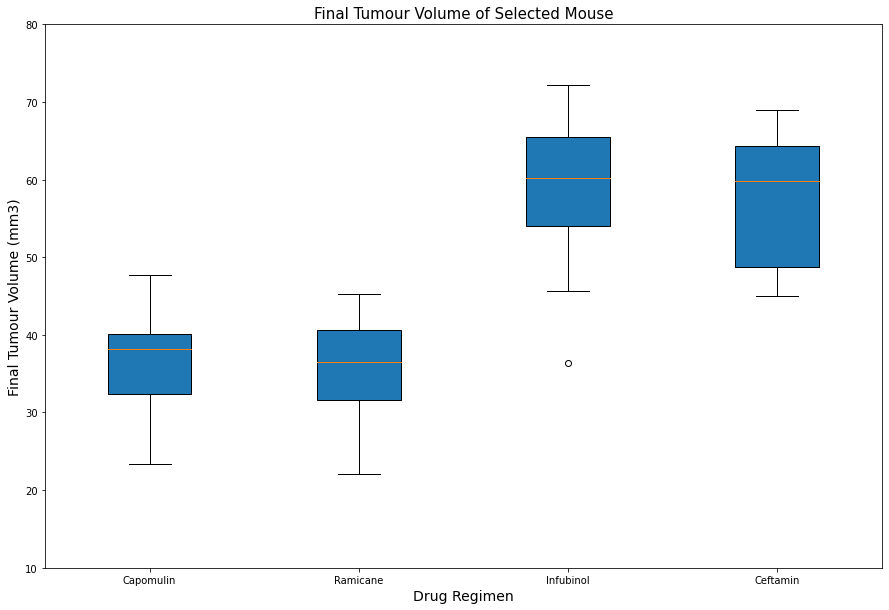

In [64]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
data_to_plot = [Capomulin_tumours, Ramicane_tumours, Infubinol_tumours, Ceftamin_tumours]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Final Tumour Volume of Selected Mouse',fontsize = 15)
ax1.set_ylabel('Final Tumour Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)


plt.show()


## Line and Scatter Plots

In [68]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
line_Capomulin = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "g316",:]
line_Capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


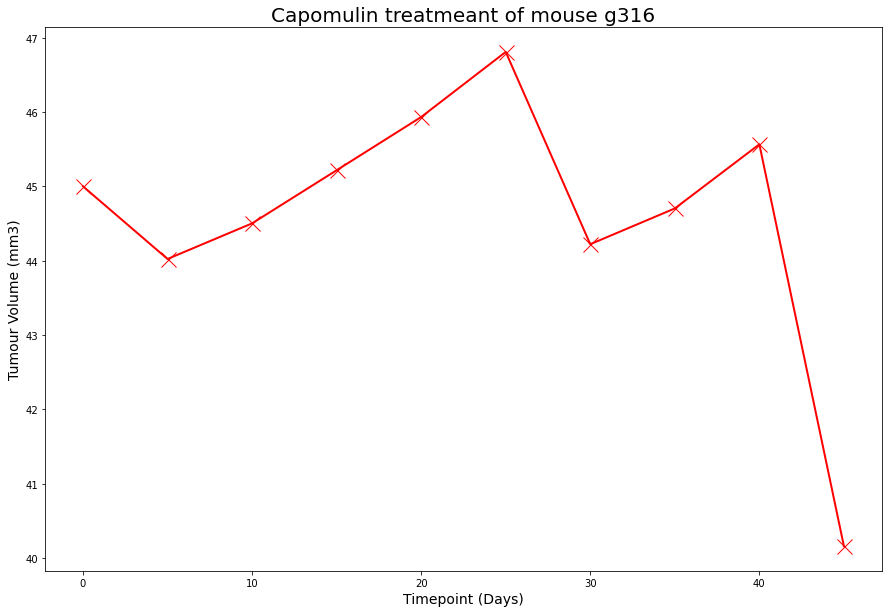

In [70]:
x_axis = line_Capomulin["Timepoint"]
tumsize = line_Capomulin["Tumour Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse g316',fontsize =20)
plt.plot(x_axis, tumsize,linewidth=2, markersize=15,marker="x",color="red")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumour Volume (mm3)',fontsize =14)

plt.show()

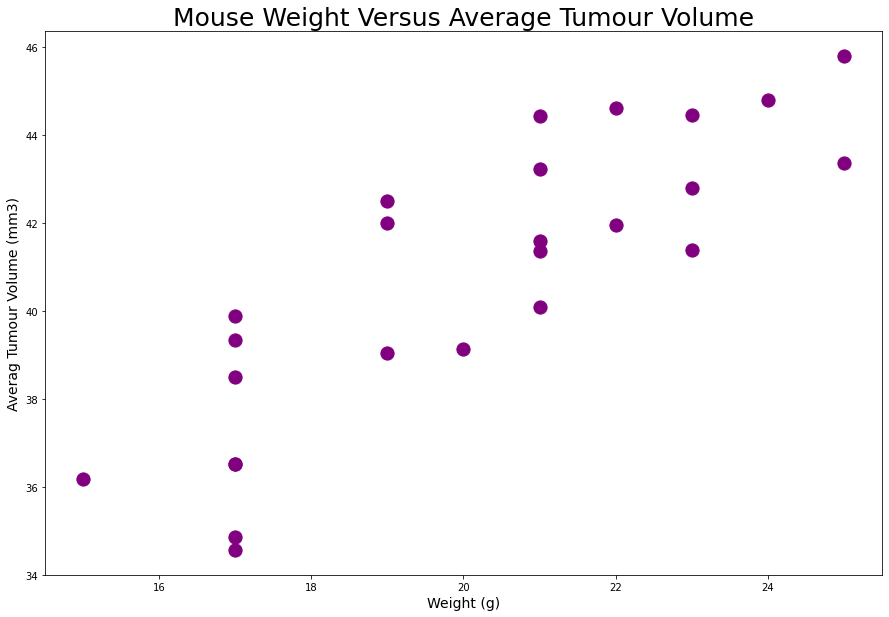

In [71]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capomulin_vol =Capomulin_data.groupby(['Mouse ID']).mean()

marker_size=20
plt.scatter(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumour Volume (mm3)'],s=175, color="purple")
plt.title('Mouse Weight Versus Average Tumour Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumour Volume (mm3)',fontsize =14)


plt.show()


## Correlation and Regression

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
Capomulin_corr=round(st.pearsonr(avg_capomulin_vol['Weight (g)'],avg_capomulin_vol['Tumour Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumour volume is {Capomulin_corr}")


The correlation between mouse weight and average tumour volume is 0.84


In [73]:
x_values = avg_capomulin_vol['Weight (g)']
y_values = avg_capomulin_vol['Tumour Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{Capomulin_corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55
